In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.data_processing import adjust_sales, product_sales_difference

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)
#%config InlineBackend.figure_format = 'svg' 

path_2022 = '../data/2022/'
path = '../data/'

FONT_TITLE = 25
FONT_LABEL = 15

In [3]:
#name_tov = pd.read_csv(path+'inf_tovar.csv', sep=';')

In [4]:
svod_shop = pd.read_csv(path_2022+'svod_shop.csv', sep=';')
svod_shop = svod_shop.rename(columns={'Unnamed: 0':'id_tt'})

In [5]:
df_04_svao = pd.read_csv(path_2022+'svao_4_april.csv', sep=';')
df_05_svao = pd.read_csv(path_2022+'svao_5_may.csv', sep=';')
df_06_svao = pd.read_csv(path_2022+'svao_6_june.csv', sep=';')

In [6]:
# Корректируем возвраты, чтоб они отнимались
df_04_svao = adjust_sales(df_04_svao)
df_05_svao = adjust_sales(df_05_svao)
df_06_svao = adjust_sales(df_06_svao)

In [7]:
# Количество видов проданных товаров в магазинах по месяцам
df_set_tov = pd.DataFrame(df_06_svao['id_tt_cl'].unique(), columns=['id_tt'])

In [8]:
gr04 = df_04_svao.groupby('id_tt_cl')['id_tov_cl'].nunique()
gr05 = df_05_svao.groupby('id_tt_cl')['id_tov_cl'].nunique()
gr06 = df_06_svao.groupby('id_tt_cl')['id_tov_cl'].nunique()

In [9]:
df_set_tov['4_tov_poz'] = df_set_tov['id_tt'].apply(lambda x: gr04[x])
df_set_tov['5_tov_poz'] = df_set_tov['id_tt'].apply(lambda x: gr05[x])
df_set_tov['6_tov_poz'] = df_set_tov['id_tt'].apply(lambda x: gr06[x])
df_set_tov

,id_tt,4_tov_poz,5_tov_poz,6_tov_poz
0,14902,3501,3482,3496
1,10864,3590,3534,3552
2,14343,3694,3690,3644
3,12181,3267,3208,3177
4,14966,3344,3355,3282
...,...,...,...,...
70,11956,3482,3430,3386
71,14125,2585,2592,2485
72,15372,3128,3052,3029
73,12046,2856,2820,2764


In [10]:
df_set_tov['5-4'] = df_set_tov['5_tov_poz'] - df_set_tov['4_tov_poz']
df_set_tov['6-5'] = df_set_tov['6_tov_poz'] - df_set_tov['5_tov_poz']

In [11]:
df_set_tov = df_set_tov.merge(svod_shop[['id_tt', 'population', 'count_shops', 'ploshad', 'Район', 'format']], how='left', on='id_tt')

In [12]:
df_set_tov

,id_tt,4_tov_poz,5_tov_poz,6_tov_poz,5-4,6-5,population,count_shops,ploshad,Район,format
0,14902,3501,3482,3496,-19,14,4712.00,2.00,139.30,Алексеевский,ВкусВилл
1,10864,3590,3534,3552,-56,18,3100.00,7.00,113.40,Алексеевский,ВкусВилл
2,14343,3694,3690,3644,-4,-46,3441.00,3.00,155.80,Ярославский,ВкусВилл
3,12181,3267,3208,3177,-59,-31,1395.00,4.00,120.30,Медведково Северное,ВкусВилл
4,14966,3344,3355,3282,11,-73,3534.00,2.00,113.60,Марьина Роща,ВкусВилл
...,...,...,...,...,...,...,...,...,...,...,...
70,11956,3482,3430,3386,-52,-44,3224.00,7.00,115.90,Лианозово,ВкусВилл
71,14125,2585,2592,2485,7,-107,2170.00,NaN,108.00,Медведково Северное,Шмель
72,15372,3128,3052,3029,-76,-23,3906.00,1.00,171.60,Отрадное,ВкусВилл
73,12046,2856,2820,2764,-36,-56,1860.00,NaN,120.50,Алтуфьевский,Шмель


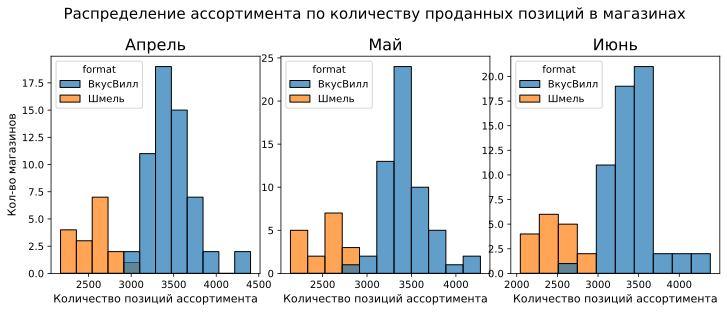

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Распределение ассортимента по количеству проданных позиций в магазинах', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('Апрель', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0], x='4_tov_poz', data=df_set_tov, hue='format', alpha=0.7)

ax[1].set_title('Май', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[1], x='5_tov_poz', data=df_set_tov, hue='format', alpha=0.7)

ax[2].set_title('Июнь', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[2], x='6_tov_poz', data=df_set_tov, hue='format', alpha=0.7)

ax[0].set_ylabel('Кол-во магазинов', fontsize=FONT_LABEL)
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[0].set_xlabel('Количество позиций ассортимента', fontsize=FONT_LABEL)
ax[1].set_xlabel('Количество позиций ассортимента', fontsize=FONT_LABEL)
ax[2].set_xlabel('Количество позиций ассортимента', fontsize=FONT_LABEL)
plt.show()

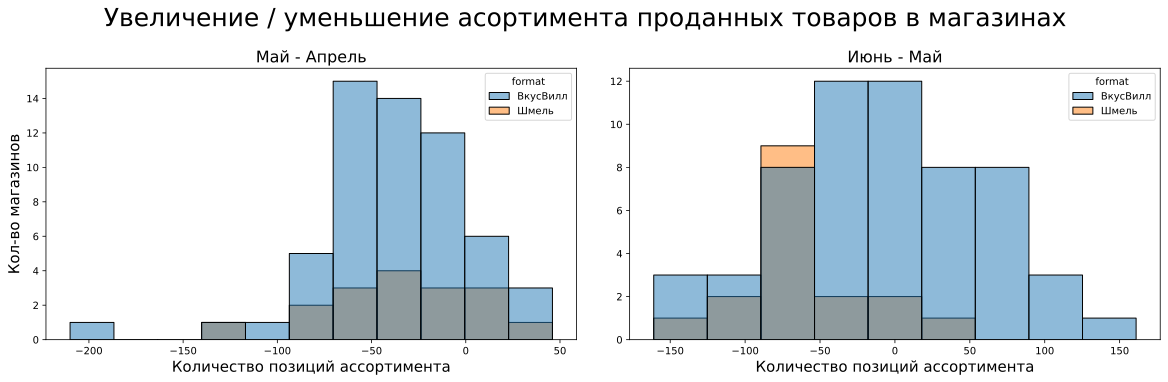

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Расстояния между графиками
fig.suptitle('Увеличение / уменьшение асортимента проданных товаров в магазинах', y=1.05, fontsize=FONT_TITLE)

ax[0].set_title('Май - Апрель', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[0], x='5-4', data=df_set_tov, hue='format', alpha=0.5)

ax[1].set_title('Июнь - Май', fontsize=FONT_LABEL+1)
sns.histplot(ax=ax[1], x='6-5', data=df_set_tov, hue='format', alpha=0.5)

ax[0].set_ylabel('Кол-во магазинов', fontsize=FONT_LABEL)
ax[1].set_ylabel('')
ax[0].set_xlabel('Количество позиций ассортимента', fontsize=FONT_LABEL)
ax[1].set_xlabel('Количество позиций ассортимента', fontsize=FONT_LABEL)

plt.show()

В одних магазинах ассортимент уменьшился, в других увеличился. 
Уменьшение ассортимента проданных товаров в мае у 62 магазинов из 75, а в июне - у 47 магазинов из 75

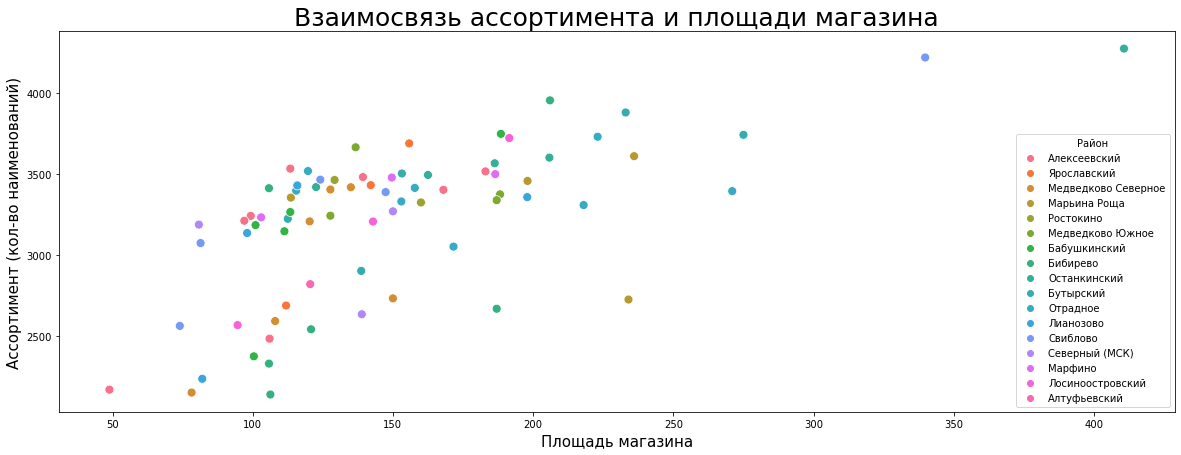

In [14]:
plt.figure(figsize=(20, 7))
plt.title('Взаимосвязь ассортимента и площади магазина', fontsize=FONT_TITLE)
sns.scatterplot(data=df_set_tov, x="ploshad", y="5_tov_poz", hue='Район', s=80)
plt.xlabel('Площадь магазина', fontsize=FONT_LABEL)
plt.ylabel('Ассортимент (кол-во наименований)', fontsize=FONT_LABEL)
plt.show()

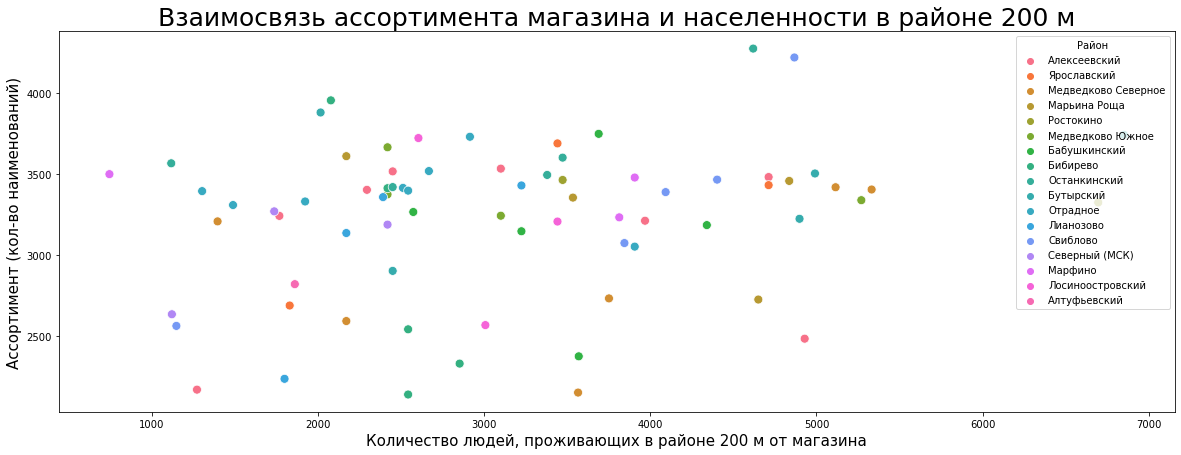

In [15]:
plt.figure(figsize=(20, 7))
plt.title('Взаимосвязь ассортимента магазина и населенности в районе 200 м', fontsize=FONT_TITLE)
sns.scatterplot(data=df_set_tov, x="population", y="5_tov_poz", hue='Район', s=80)
plt.xlabel('Количество людей, проживающих в районе 200 м от магазина', fontsize=FONT_LABEL)
plt.ylabel('Ассортимент (кол-во наименований)', fontsize=FONT_LABEL)
plt.show()

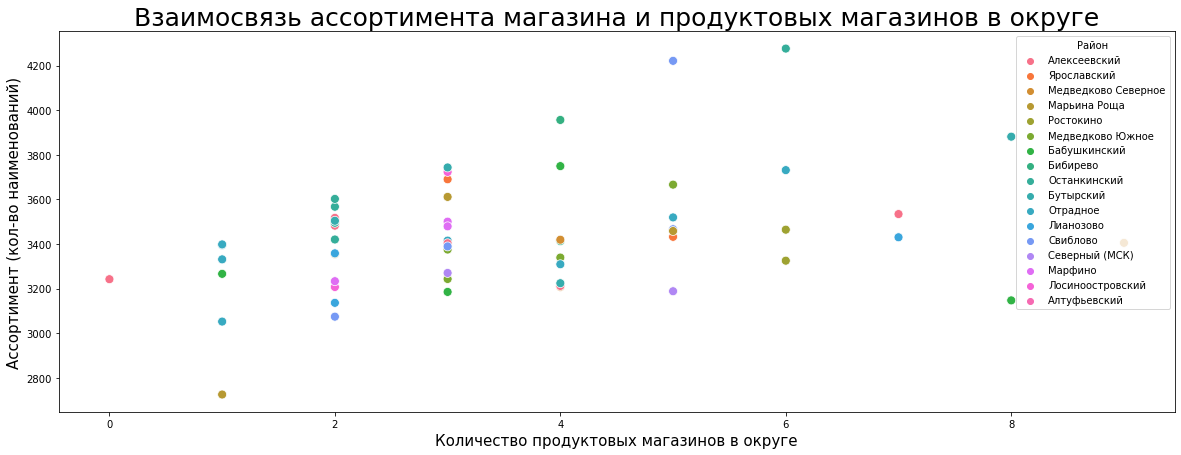

In [16]:
plt.figure(figsize=(20, 7))
plt.title('Взаимосвязь ассортимента магазина и продуктовых магазинов в округе', fontsize=FONT_TITLE)
sns.scatterplot(data=df_set_tov, x="count_shops", y="5_tov_poz", hue='Район', s=80)
plt.xlabel('Количество продуктовых магазинов в округе', fontsize=FONT_LABEL)
plt.ylabel('Ассортимент (кол-во наименований)', fontsize=FONT_LABEL)
plt.show()

In [17]:
# Сохранение свода
df_set_tov.to_csv(path_2022+f'/vv_tov/свод_по_кол_ассорт.csv', sep=';', index=False)

## Сбор информации о продажах товаров по каждому магазину

In [18]:
# Списки ВкусВиллов и Шмелей
vv_id_tt_list = list(df_set_tov[df_set_tov['format'] == 'ВкусВилл']['id_tt'].unique())
sh_id_tt_list = list(df_set_tov[df_set_tov['format'] == 'Шмель']['id_tt'].unique())

### Функции обработки данных

In [19]:
def product_sales_difference_m(df, id_shop1, id_shop2, sum_sale=5000):
    '''
    Функци принимает на вход датафрейм, и id двух магазинов.
    
    Рассчитывает какие товары были проданны в первом магазине и 
    не проданы во втором.
    
    sum_sale = минимальная сумма выручки, которая береться у 
    первого магазина для отбора проданных товаров
    
    Возвращает датафрейм:
    Колонки: Количество, Сумма, Наименование, Подгруппа, Группа
    Индексы строк - id товаров
    
    Для наименования товара закачиваем датасет с ними
    inf_tovar.csv
    '''
    
    df_shop_1 = df[df['id_tt_cl'] == id_shop1]
    df_shop_2 = df[df['id_tt_cl'] == id_shop2]
    
    name_tov = pd.read_csv('../data/inf_tovar.csv', sep=';')
    #name_tov = name_tov.rename(columns={'Unnamed: 0': 'id_tov_cl'})
    
    gr_shop_1 = df_shop_1.groupby('id_tov_cl')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)
    gr_shop_2 = df_shop_2.groupby('id_tov_cl')[['Quantity', 'BaseSum']].sum().sort_values('BaseSum', ascending=False)

        
    id_tov_set1 = set(gr_shop_1[gr_shop_1['BaseSum'] > sum_sale].index)
    id_tov_set2 = set(gr_shop_2.index)
    diff_id_tov = list(id_tov_set1 - id_tov_set2)
    
    dict_tov_diff = {}
    i=0
    for el in diff_id_tov:
        dict_tov_diff[i] = {
            'id_tt_cl': id_shop1,
            'id_tov_cl': el,
            'Quantity': int(gr_shop_1['Quantity'][el]),
            'BaseSum': int(gr_shop_1['BaseSum'][el])
        }
        i+=1
    
    df_tov_diff = pd.DataFrame(dict_tov_diff).T
    
    if df_tov_diff.shape != (0, 0):
        df_tov_diff = df_tov_diff.merge(name_tov, how='left', on='id_tov_cl')
    
    return df_tov_diff

In [20]:
def group_tovar(df_shop):
    '''
    Функция группирует проданные товары по всем магазинам
    Принимает на вход датафрейм и на выход выдает датафрейм 
    с расчитанными значениями медианой и среднем по количеству и сумме продаж,
    подсчету количества магазинов, в которых в текущем месяце были реализованные данные товары
    и список этих магазинов
    '''
    
    tov_list = list(df_shop['id_tov_cl'].unique())

    tov_dict = {}
    i = 0
    for el in tov_list:
        
        df_el = df_shop[df_shop['id_tov_cl'] == el]
        
        tov_dict[i] = {
            'id_tov_cl': el,
            'Quantity_median': int(df_el['Quantity'].median()),
            'Quantity_mean': int(df_el['Quantity'].mean()),
            'BaseSum_median': int(df_el['BaseSum'].median()),
            'BaseSum_mean': int(df_el['BaseSum'].mean()),
            'Shop_count': df_el.shape[0] ,
            'Shop_list': list(df_el['id_tt_cl'].unique())
            }
        i+=1

        gr_df_tov = pd.DataFrame(tov_dict).T

        name_tov = pd.read_csv('../data/inf_tovar.csv', sep=';')
        #name_tov = name_tov.rename(columns={'Unnamed: 0': 'id_tov_cl'})
        if gr_df_tov.shape != (0, 0):
            gr_df_tov = gr_df_tov.merge(name_tov, how='left', on='id_tov_cl' )
    return gr_df_tov

In [1]:
def previous_period(gr_shop, shop2, df_minus1, df_minus2):
    tov_list = list(gr_shop['id_tov_cl'].unique())

    df_minus1 = df_minus1[df_minus1['id_tt_cl']==shop2]
    df_minus2 = df_minus2[df_minus2['id_tt_cl']==shop2]

    tov_dict = {}

    i=0
    for el in tov_list:
        df_1 = df_minus1[df_minus1['id_tov_cl']==el]
        df_2 = df_minus2[df_minus2['id_tov_cl']==el]


        tov_dict[i]={
            'id_tov_cl': el,
            'Quantity_minus_1': int(df_1['Quantity'].sum()) ,
            'BaseSum_minus_1': int(df_1['BaseSum'].sum()) ,
            'Quantity_minus_2': int(df_2['Quantity'].sum()) ,
            'BaseSum_minus_2': int(df_2['BaseSum'].sum()),
        }
        i += 1

    df_minus = pd.DataFrame(tov_dict).T 
    
    name_tov = pd.read_csv('../data/inf_tovar.csv', sep=';')
    #name_tov = name_tov.rename(columns={'Unnamed: 0': 'id_tov_cl'})
    df_minus = df_minus.merge(name_tov, how='left', on='id_tov_cl' )
    
    return df_minus


### Цикл обработки данных

In [22]:
# По формату магазинов ВкусВилл
for shop2 in vv_id_tt_list:
    
    df_shop = pd.DataFrame()
    
    for shop1 in vv_id_tt_list:
        df_shop_tmp = product_sales_difference_m(df_06_svao, shop1, shop2, sum_sale=5000)
        df_shop = pd.concat([df_shop, df_shop_tmp], axis=0, ignore_index=True)
    
    df_shop = df_shop.sort_values(by=['name_gr', 'name_gr2', 'name'])    
    #df_shop.to_csv(path_2022+f'/tov_set/{shop2}_6_июнь_full.csv', sep=';', index=False)
    
    gr_shop = group_tovar(df_shop)
    gr_shop = gr_shop.sort_values(by=['name_gr', 'name_gr2', 'name'])
    gr_shop.to_csv(path_2022+f'/vv_tov/{shop2}_6_июнь.csv', sep=';', index=False)
    
    previous = previous_period(gr_shop, shop2, df_05_svao, df_04_svao)
    previous.to_csv(path_2022+f'/vv_tov/{shop2}_июнь_минус_5_4.csv', sep=';', index=False)
    
    no_tov = previous[(previous['Quantity_minus_1']==0) & (previous['Quantity_minus_2']==0)]['id_tov_cl'].to_list()
    df_finish = pd.DataFrame(no_tov, columns=['id_tov_cl'])
    df_finish = df_finish.merge(gr_shop, how='left', on='id_tov_cl')  
    df_finish = df_finish.sort_values(by=['name_gr', 'name_gr2', 'name'])
    df_finish.to_csv(path_2022+f'/vv_tov/{shop2}_июнь_итог.csv', sep=';', index=False)
    

In [24]:
# По формату магазинов Шмель
for shop2 in sh_id_tt_list:
    
    df_shop = pd.DataFrame()
    
    for shop1 in sh_id_tt_list:
        df_shop_tmp = product_sales_difference_m(df_06_svao, shop1, shop2, sum_sale=5000)
        df_shop = pd.concat([df_shop, df_shop_tmp], axis=0, ignore_index=True)
    
    df_shop = df_shop.sort_values(by=['name_gr', 'name_gr2', 'name'])    
    #df_shop.to_csv(path_2022+f'/tov_set/{shop2}_6_июнь_full.csv', sep=';', index=False)
    
    gr_shop = group_tovar(df_shop)
    gr_shop = gr_shop.sort_values(by=['name_gr', 'name_gr2', 'name'])
    gr_shop.to_csv(path_2022+f'/sh_tov/{shop2}_6_июнь.csv', sep=';', index=False)
    
    previous = previous_period(gr_shop, shop2, df_05_svao, df_04_svao)
    previous.to_csv(path_2022+f'/sh_tov/{shop2}_июнь_минус_5_4.csv', sep=';', index=False)
    
    no_tov = previous[(previous['Quantity_minus_1']==0) & (previous['Quantity_minus_2']==0)]['id_tov_cl'].to_list()
    df_finish = pd.DataFrame(no_tov, columns=['id_tov_cl'])
    df_finish = df_finish.merge(gr_shop, how='left', on='id_tov_cl')  
    df_finish.to_csv(path_2022+f'/sh_tov/{shop2}_июнь_итог.csv', sep=';', index=False)
    

In [32]:
name_tov = pd.read_csv('../data/inf_tovar.csv', sep=';')
# name_tov = name_tov.rename(columns={'Unnamed: 0': 'id_tov_cl'})
# df_for_parser = df_06_svao.merge(name_tov, how='left', on='id_tov_cl' )

In [28]:
len(df_for_parser[df_for_parser['name'].isna()]['id_tov_cl'].unique())

468

In [33]:
name_tov

,id_tov_cl,name,name_gr2,name_gr
0,1655,Лукум с клюквой,"Зефир, безе, пастила","Сладости, кондитерские изделия"
1,1698,"Творог мягкий 4,5%",Творога мягкие,Молочная Продукция
2,1225,"Сливки 10%, 450 мл",Сливки,Молочная Продукция
3,16230,"Батончик мягкий ""Годжи-гуарана""",Бакалея даркстор,Бакалея
4,52,Сметана 25%,Сметана,Молочная Продукция
...,...,...,...,...
7062,61555,Бумага туалетная Veiro Домашняя белая 2-слойна...,Каталог,Главная
7063,64462,Пивной напиток «Wishbringer» Imp. Sour Ale,"Пиво, медовуха",Алкоголь
7064,64108,Салат с овощами и моцареллой,Салаты и закуски,Готовая еда
7065,63961,"Буррито с курицей, 160 грамм",Сэндвичи,Сэндвичи и пирожки
